# Homework 1

## Exersice 03
Exercise 3 (Virus test) A medical company is assessing a newly developed
test for a certain virus. The so called false negative rate is small: if you have
contracted the virus, the probability that the test returns a positive result is
0.999. The false positive rate is also small: if you do not have the virus, the
probability that the test returns a positive result is only 0.005. Assume that 2%
of the population has contracted the virus. If a person chosen uniformly from
the population is tested and the result comes back positive, what is the probability
that the person has the virus?

In python: Draw N = 10^4 pseudo random samples representing the infection
status of N individuals. Use these samples and the statistics described above for
the virus test to draw pseudo random samples representing a positive or negative
virus test for each individual and verify your results from above.
### Answers:

\begin{equation}
 \frac{0.999 \cdot 0.02}{0.999 \cdot 0.02+ 0.005\cdot (1-0.02)} = 0.80
\end{equation}


### Solution:
we can describe the scenario using bayes theroem by the following formulas
\begin{equation}
P(x|y) = \frac{P(y|x) \cdot P(x)}{P(y)} = \frac{0.999 \cdot 0.02}{P(y)}
\end{equation}

\begin{equation}
 \frac{0.999 \cdot 0.02}{0.999 \cdot 0.02+ 0.005\cdot (1-0.02)} = 0.80
\end{equation}


In [67]:
import numpy as np
import random

# Probabilities
pinf = 0.02  # Probability of being infected
fnr = 0.001  # False negative rate
fpr = 0.005  # False positive rate
Samples = 10**4  # Number of samples

# Generate random samples
status = [1 if random.random() < pinf else 0 for _ in range(Samples)]

# Simulation
test_results = []
for s in status:
    if s == 1:
        # If  person is infected
        test_result = 1 if random.random() < (1 - fnr) else 0
    else:
        # If person not infected
        test_result = 1 if random.random() < fpr else 0
    test_results.append(test_result)



pt = sum(test_results)
ptwv = sum([1 for s, t in zip(status, test_results) if s == 1 and t == 1])

Phv = ptwv / pt

print("Probability that a person has the virus given a positive test result:", Phv)


Probability that a person has the virus given a positive test result: 0.792


## Exercise 8 (Group Testing)
 A blood test is to be performed on n individuals. Each person can be tested separately, but this is expensive. An alternative
strategy is to pool and analyze together the samples of k people. If the test
is negative, this one test suffices for the group of k people. If the test is positive,
then each of the k persons must be tested individually, which results in k + 1
total tests for the k people. Suppose we create n/k disjoint groups of k people
(where k divides n) and use the pooling method. Assume that each person has
positive result on the test independently with probability p.
• What is the probability that the test for a pooled sample of k people will
be positive? What is the expected number of tests necessary? python:
Confirm your calculations by drawing n = 102 pseudo random test results
and dividing the test results into groups of k = 10 with p ∈ {0.02, 0.2, 0.6}.
Average your results over 104 iterations.
• Describe how to find the best value of k. Derive an approximation as-
suming p is close to 0. python: Find the optimal integer k for p ∈
{0.02, 0.2, 0.6} by assuming k < 100. Compare with your approximation.
20
Giuseppe Durisi, Probability and Statistical Learning using Python August 23, 2023
• For which values of p is pooling better than just testing every individual?
Again, derive an approximation assuming p is small and plug in your
approximation of the best value of k. python: Using your results from the
previous parts, test if pooling is better or not for n = 102, 0.01 ≤ p ≤ 0.5
and the best integer value of k (assume k < 100). Compare with your
approximation. You might want to plot some function for different values
of p


### Answers: 
Fill in your answers here so that Carl can do a quick check if they are right/wrong

* ...


### Solution:



Theoretical expectation: [ 28.29271931  99.26258176 109.98951424]
Empirical expectation: [ 28.384  99.29  109.992]


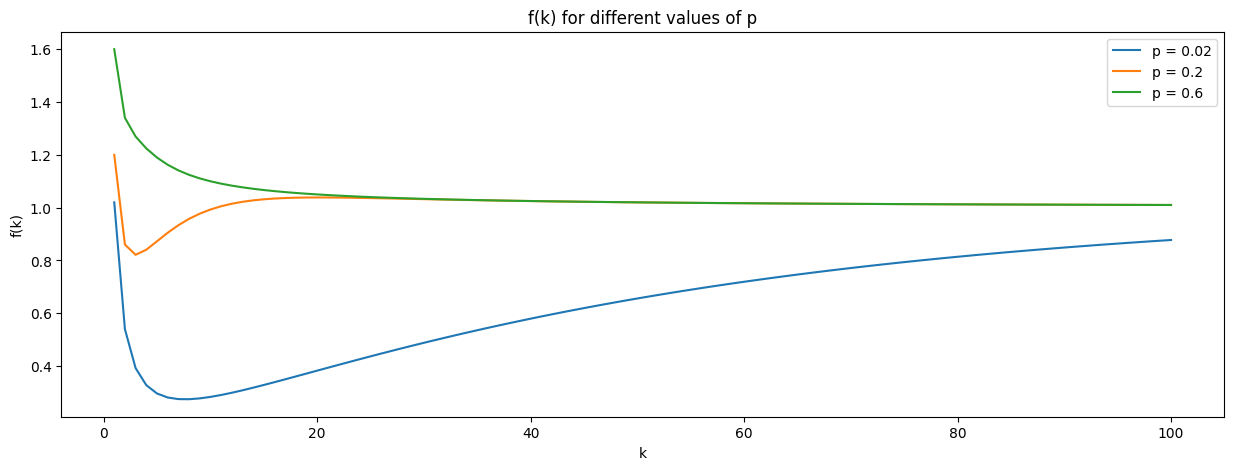

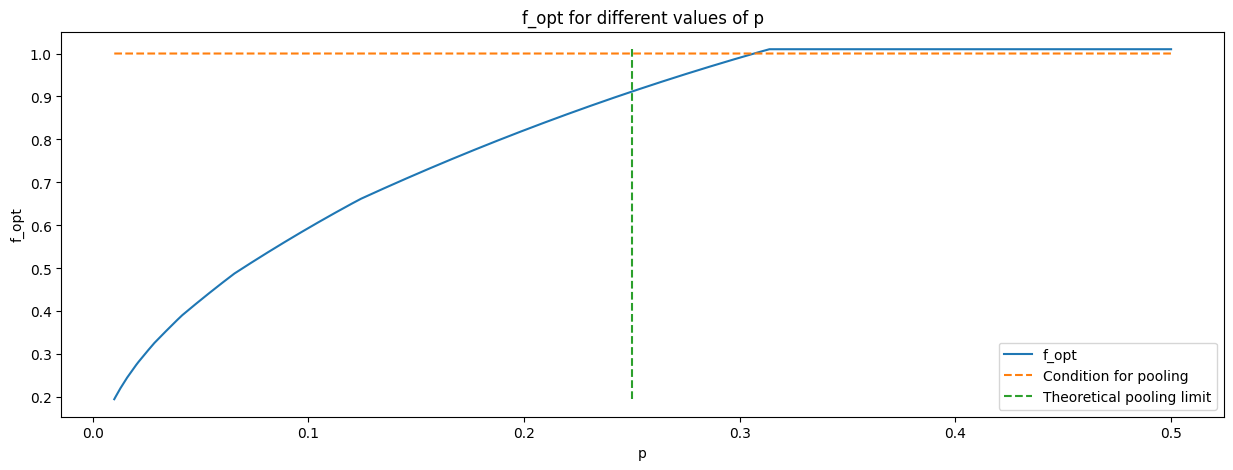

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p_values = np.array([0.02, 0.2, 0.6])
n_iter = int(1e4)
n_tests = int(1e2)
n_gr = 10

# Initialize arrays
tests = np.empty((p_values.size, n_iter, n_tests))
pooled_tests = np.zeros((p_values.size, n_iter, n_gr))

# Simulate tests
for i, p in enumerate(p_values):
    tests[i, :, :] = np.random.choice(2, (n_iter, n_tests), p=[1 - p, p])

# Pooling tests
k = n_tests // n_gr
for j in range(n_gr):
    pooled_tests[:, :, j] = np.sum(tests[:, :, k * j:k * (j + 1)], axis=-1)

pooled_tests[pooled_tests > 0] = k

X = np.sum(pooled_tests + 1, axis=-1)

Ex_X_emp = np.mean(X, axis=-1)

# Theoretical calculation
Ex_X = n_tests + n_tests / k - n_tests * (1 - p_values) ** k

print('Theoretical expectation: ' + str(Ex_X))
print('Empirical expectation: ' + str(Ex_X_emp))

# Find optimal integer k
k_values = np.arange(1, 101)
f_k_values = []

for p in p_values:
    f_k = 1 + 1 / k_values - ((1 - p) ** k_values)
    f_k_values.append(f_k)

# Plot f(k) for different values of p
fig = plt.figure(figsize=[15, 5])
for i, p in enumerate(p_values):
    plt.plot(k_values, f_k_values[i], label='p = ' + str(p))

plt.xlabel('k')
plt.ylabel('f(k)')
plt.legend()
plt.title('f(k) for different values of p')
plt.show()


p = np.linspace(0.01,0.5,int(1e4))

k = (np.arange(100)+1)
f = 1 + 1/k - np.power.outer((1-p),k)
# Condition for pooling to be better is f_k < 1

k_opt = k[np.argmin(f,axis = 1 )]

f_opt = 1 + 1/k_opt - np.power((1-p),k_opt)

fig = plt.figure(figsize = [15,5])
plt.plot(p,f_opt)
plt.plot(p,np.ones(p.shape),'--')
plt.plot([0.25,0.25],[np.amin(f_opt),np.amax(f_opt)],'--')
plt.xlabel('p')
plt.ylabel('f_opt')
plt.legend(['f_opt','Condition for pooling', 'Theoretical pooling limit'])
plt.title('f_opt for different values of p')
plt.show()
